$ \Delta U = u_{\infty} \cdot \left( 1 - \sqrt{1 - C_T} \right) $

$ \Delta u(r) = u_\infty \left(1 - \sqrt{1 - C_T} \right) \cdot \exp\left( -\frac{1}{2} \left( \frac{r}{\sigma} \right)^2 \right) $


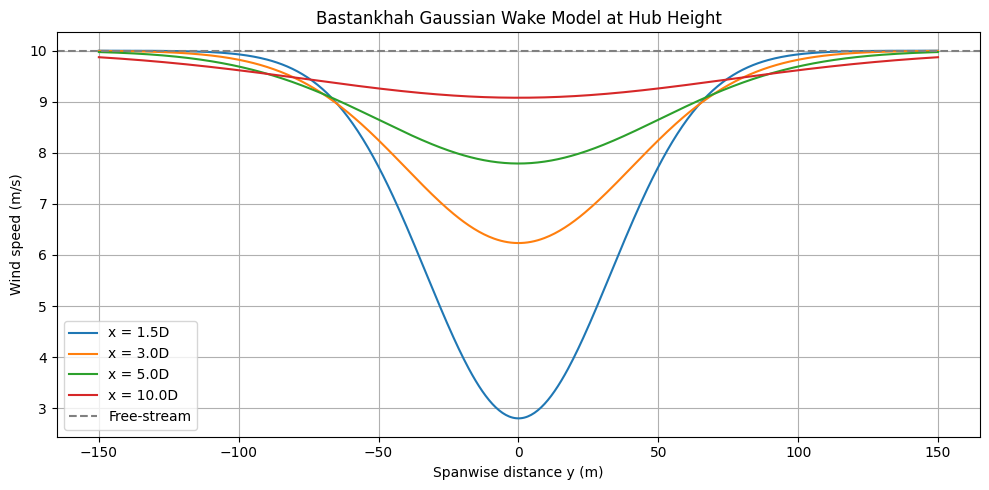

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 100                          # Rotor diameter [m]
u_inf = 10                       # Free-stream velocity [m/s]
C_T = 0.8                        # Thrust coefficient
U0 = 10.0
k_star = 0.05                    # Wake growth rate k*
z_h = 70                         # Hub height [m]
z = z_h                          # Vertical coordinate = hub height
x_vals = [1.5*D, 3*D, 5*D, 10*D] # Downstream distances
y = np.linspace(-150, 150, 500)  # Spanwise coordinates

# Compute b and epsilon (ε) as per equation (6) and (21)
b = 0.5 * (1 + np.sqrt(1 - C_T)) / np.sqrt(1 - C_T)
epsilon = 0.2 * np.sqrt(b)

# Initialize plot
plt.figure(figsize=(10, 5))

# Evaluate velocity deficit profile at different downstream distances
for x in x_vals:
    s = k_star * x / D + epsilon
    delta_u_norm = (1 - np.sqrt(1 - C_T / (8 * s**2))) * np.exp(-0.5 * ((y / D)**2) / (s**2))
    u = u_inf * (1 - delta_u_norm)
    plt.plot(y, u, label=f'x = {x/D:.1f}D')

# Plot formatting
plt.axhline(u_inf, color='gray', linestyle='--', label="Free-stream")
plt.xlabel("Spanwise distance y (m)")
plt.ylabel("Wind speed (m/s)")
plt.title("Bastankhah Gaussian Wake Model at Hub Height")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

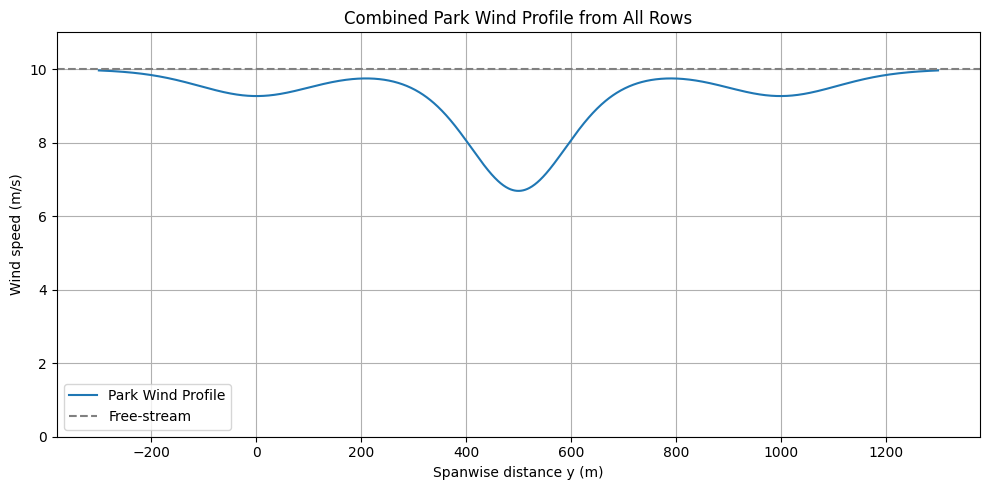

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 100                          # Rotor diameter [m]
u_inf = 10                       # Free-stream velocity [m/s]
C_T = 0.8                        # Thrust coefficient
U0 = 10.0
k_star = 0.05                    # Wake growth rate k*
z_h = 70                         # Hub height [m]
z = z_h                          # Vertical coordinate = hub height

# Turbine positions
turbine_positions = [
    (0, 0),
    (10*D, 0),
    (0, 5*D),
    (2.5*D, 5*D),
    (5*D, 5*D),
    (7.5*D, 5*D),
    (10*D, 5*D),
    (12.5*D, 5*D),
    (15*D, 5*D),
    (0, 10*D),
    (10*D, 10*D)
]

# Coordinate sets for turbines
unique_y_coords = set(pos[1] for pos in turbine_positions)

# Park Wind Profile Array (spanwise axis)
y_min = min(unique_y_coords) - 3 * D
y_max = max(unique_y_coords) + 3 * D
y = np.linspace(y_min, y_max, int((y_max - y_min) + 1))  # 1-meter resolution
Park_Wind_Profile = np.full_like(y, u_inf)

# Define downstream edge
max_x_turbine = max(pos[0] for pos in turbine_positions)
downstream_edge = max_x_turbine + 10 * D

# Compute b and epsilon (ε)
b = 0.5 * (1 + np.sqrt(1 - C_T)) / np.sqrt(1 - C_T)
epsilon = 0.2 * np.sqrt(b)

# Evaluate velocity deficit from each turbine
for (x_turb, y_turb) in turbine_positions:
    x = downstream_edge - x_turb
    s = k_star * x / D + epsilon

    # Spanwise wake profile centered around y_turb
    y_local = y - y_turb  # Shifted coordinate system for wake center
    delta_u_norm = (1 - np.sqrt(1 - C_T / (8 * s**2))) * np.exp(-0.5 * ((y_local / D)**2) / (s**2))
    u = u_inf * (1 - delta_u_norm)

    # Superimpose deficit (lower wind speed) onto the main Park Wind Profile
    Park_Wind_Profile -= (u_inf - u)

# Plot the final Park Wind Profile
plt.figure(figsize=(10, 5))
plt.plot(y, Park_Wind_Profile, label="Park Wind Profile")
plt.axhline(u_inf, color='gray', linestyle='--', label="Free-stream")
plt.xlabel("Spanwise distance y (m)")
plt.ylabel("Wind speed (m/s)")
plt.title("Combined Park Wind Profile from All Rows")
plt.legend()
plt.ylim(0, u_inf + 1)
plt.grid(True)
plt.tight_layout()
plt.show()